In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from seirsplus.calibration import _get_vl_with_plateau, gen_vl_distribution_with_plateau

In [54]:
# convert critical Ct values in Brault Table 1 to log10 VL
# TODO: the tail plateau seems pretty high, I think it should be somewhat smaller

def Ct_to_VL(Ct):
    return (14 + np.log10(1.105))-0.681/(np.log(10))*Ct

print(Ct_to_VL(22.6), Ct_to_VL(33.6))

7.359309624840942 4.106009660903684


## Test the function for generating a single trajectory of expected viral load values over time

In [57]:
critical_time_points = [5, 7, 11, 16]
peak_plateau_height = 7.359
tail_plateau_height = 4.106

vls = []
sample_times = np.linspace(0, 20, 41)

for sample_time in sample_times:
    vls.append(_get_vl_with_plateau(
        critical_time_points,
        peak_plateau_height,
        tail_plateau_height,
        sample_time
    ))


Text(0.5, 1.0, 'Example expected viral load over time with plateau')

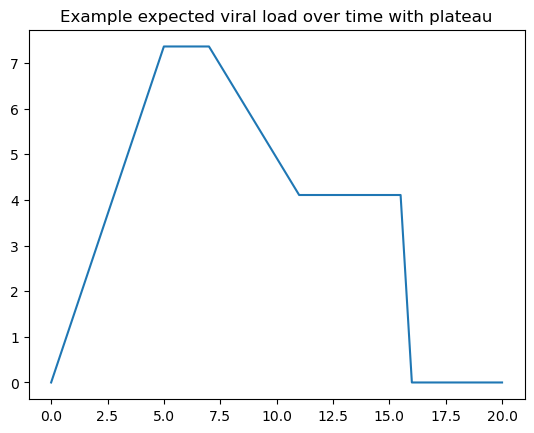

In [58]:

plt.plot(sample_times, vls)
plt.title("Example expected viral load over time with plateau")

## Test the function for sampling viral loads of a population

with noise added, i.e., VL_i(t) | params = E[VL(t) | params] + N(0, noise)

Text(0.5, 1.0, 'Sampled viral loads, noise=0.8')

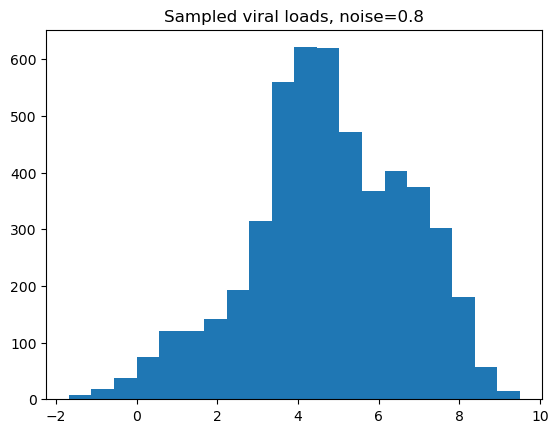

In [50]:
NOISE=0.8

sampled_vls, time_stamps = gen_vl_distribution_with_plateau(
    critical_time_points_bounds=[(5,5), (7,7), (11,11), (16,16)],
    peak_plateau_height_bounds=(7.359, 7.359), # fix this for now
    tail_plateau_height=4.106,
    num_samples=5000,
    noise=NOISE
)
    
plt.hist(sampled_vls, bins=20)
plt.title(f"Sampled viral loads, noise={NOISE}")

Text(0.5, 1.0, 'Sampled viral loads, noise=0.5')

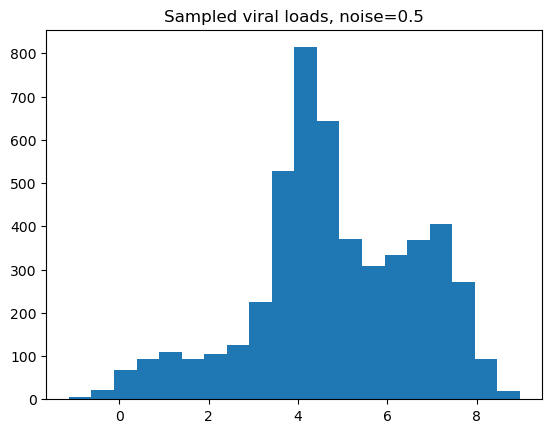

In [52]:
NOISE=0.5

sampled_vls, time_stamps = gen_vl_distribution_with_plateau(
    critical_time_points_bounds=[(5,5), (7,7), (11,11), (16,16)],
    peak_plateau_height_bounds=(7.359, 7.359), # fix this for now
    tail_plateau_height=4.106,
    num_samples=5000,
    noise=NOISE
)
    
plt.hist(sampled_vls, bins=20)
plt.title(f"Sampled viral loads, noise={NOISE}")

Text(0.5, 1.0, 'Sampled viral loads, noise=0.2')

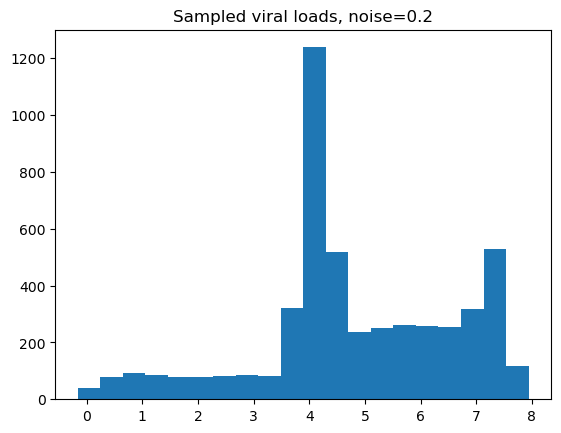

In [53]:
NOISE=0.2

sampled_vls, time_stamps = gen_vl_distribution_with_plateau(
    critical_time_points_bounds=[(5,5), (7,7), (11,11), (16,16)],
    peak_plateau_height_bounds=(7.359, 7.359), # fix this for now
    tail_plateau_height=4.106,
    num_samples=5000,
    noise=NOISE
)
    
plt.hist(sampled_vls, bins=20)
plt.title(f"Sampled viral loads, noise={NOISE}")